<a href="https://colab.research.google.com/github/Mashaell22/repot5/blob/main/OCR_Practice_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR Practice Exercise

In this exercise, you will work on Optical Character Recognition (OCR) using the Keras OCR library.
Your task is to detect and recognize text from images. This notebook will guide you through the process of setting up the environment, loading and preprocessing images, applying the OCR model, and displaying the results.

## Objectives
- Set up the environment and install necessary libraries.
- Load and preprocess images for OCR.
- Apply the Keras OCR model to detect and recognize text.
- Display and analyze the OCR results.

This exercise is designed to help you understand the OCR pipeline, from image preprocessing to text recognition, and prepare you for the practical exam.
The example image can be found under `Datasets/OCR_Example`.

## Install Libraries

In [1]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract
!pip install easyocr
!pip install keras-ocr
!pip install tensorflow==2.9.1 keras==2.9.0

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [962 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,264 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,498 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,425 kB

## Import necessary libraries
In this step, you can import these libraries to help you:
- `keras_ocr`
- `matplotlib.pyplot`
- `keras_ocr.pipeline.Pipeline`
- `opencv`
- `numpy`

You can use any other libraries

In [2]:
import cv2
import pytesseract
import easyocr
import keras_ocr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Download and visualize sample image
Here we will be downloading the image for OCR.

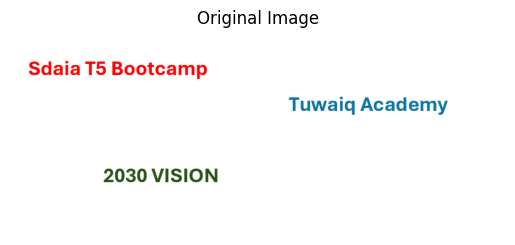

In [4]:
def display_image(image, title, is_rgb=False):
    if is_rgb:
        # OpenCV loads images in BGR format by default, so we have to convert BGR to RGB for proper color display
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
    else:
        plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
image_path = '/content/Basic_OCR.png'
image = cv2.imread(image_path)

display_image(image, "Original Image",  is_rgb=True)

## Preprocess the image
This step involves converting the images into a format suitable for OCR, using OpenCV and standard preprocessing techniques such as resizing and color conversion.

### Convert to grayscale

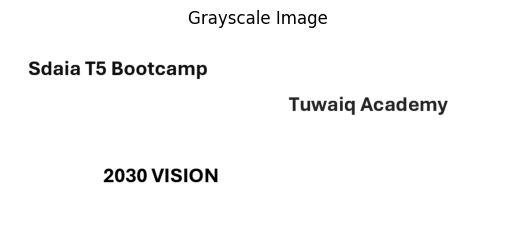

In [5]:
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_image = get_grayscale(image)
display_image(gray_image, "Grayscale Image")

### Remove noise

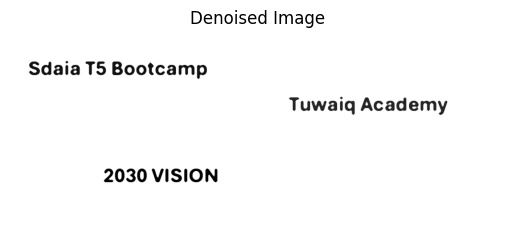

In [6]:
def remove_noise(image):
    return cv2.medianBlur(image, 5)

denoised_image = remove_noise(gray_image)
display_image(denoised_image, "Denoised Image")

### Sharpen the image

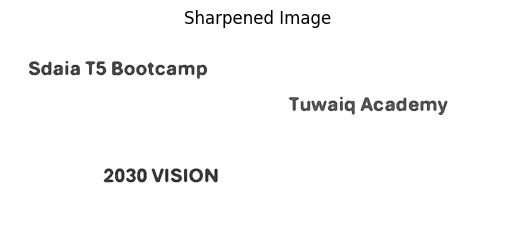

In [7]:
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])  # Sharpening kernel
    return cv2.filter2D(image, -1, kernel)

sharpened_image = sharpen_image(denoised_image)
display_image(sharpened_image, "Sharpened Image")

### Binarize the image

In [8]:
def binarize_image(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

## Display preprocessed images
Display the preprocessed images .

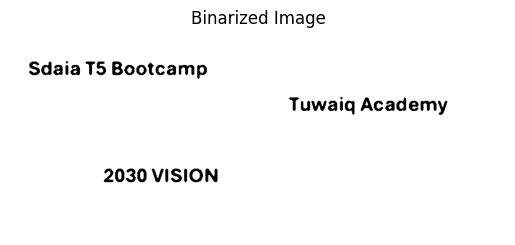

In [9]:
binarized_image = binarize_image(sharpened_image)
display_image(binarized_image, "Binarized Image")

## Get the OCR model using keras_ocr
Create a keras_ocr pipeline, to handle text detection and recognition using pre-trained model.

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 4s 4s/step


<Axes: >

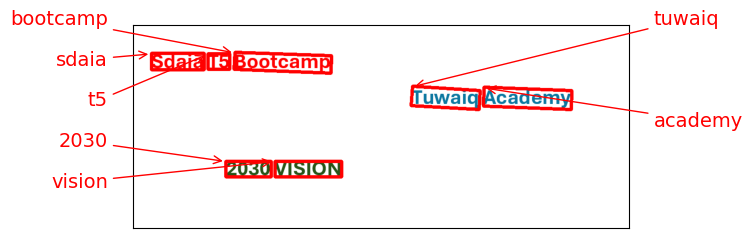

In [10]:

pipeline = keras_ocr.pipeline.Pipeline()

images = [keras_ocr.tools.read('/content/Basic_OCR.png')]

prediction_groups = pipeline.recognize(images)

keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction_groups[0])


## Perform OCR on the image
Runs the OCR pipeline on the preprocessed image and extracts text.

In [21]:

import keras_ocr

# Create a keras_ocr pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# Load and preprocess the image if necessary
image = keras_ocr.tools.read('/content/Basic_OCR.png')

# Run the pipeline on the image
prediction_groups = pipeline.recognize([image])

# Display the extracted text with bounding boxes
for text, box in prediction_groups[0]:
    print(f"Detected text: {text} with bounding box: {box}")


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


1/1 [==============================] - 30s 30s/step


1/1 [==============================] - 4s 4s/step
Detected text: sdaia with bounding box: [[ 38.148438  60.234375]
 [147.57422   60.234375]
 [147.57422   94.36719 ]
 [ 38.148438  94.36719 ]]
Detected text: t5 with bounding box: [[155.60547  61.23828]
 [200.78125  61.23828]
 [200.78125  93.36328]
 [155.60547  93.36328]]
Detected text: bootcamp with bounding box: [[211.3085    58.095924]
 [411.36917   65.50558 ]
 [410.04898  101.15112 ]
 [209.98831   93.74147 ]]
Detected text: tuwaiq with bounding box: [[579.1787  128.43375]
 [719.61005 137.05672]
 [717.1763  176.69368]
 [576.74493 168.07071]]
Detected text: academy with bounding box: [[727.57104 130.63538]
 [909.54944 137.77177]
 [908.03253 176.45128]
 [726.0542  169.31487]]
Detected text: 2030 with bounding box: [[192.74997 283.10153]
 [286.11325 283.10153]
 [286.11325 315.22653]
 [192.74997 315.22653]]
Detected text: vision with bounding box: [[294.14453 283.10156]
 [432.6836  283.10156]
 [432.6836  315.22656]
 [294.14453 315.22656]]


In [12]:
if len(image.shape) == 2:
    # Convert grayscale image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# If the image has only one channel (grayscale), convert it to three channels
elif image.shape[2] == 1:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# If the image is already in BGR format (standard for OpenCV), convert to RGB
elif image.shape[2] == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# KerasOCR requires the image to be passed as a list, even if you're working with a single image
images = [image]

## Display the OCR predictions
The predictions made by the keras_ocr pipeline are stored in a variable. You should inspect the recognized text and do the following:
* You should print the detected texts in the image.
* You can also use `keras_ocr.tools.drawAnnotations()` to visualize the extracted text.

In [15]:
for text, box in prediction_groups[0]:
    print(f"Detected text: {text} with bounding box: {box}")


Detected text: sdaia with bounding box: [[ 37.14453   60.234375]
 [148.57812   60.234375]
 [148.57812   95.37109 ]
 [ 37.14453   95.37109 ]]
Detected text: t5 with bounding box: [[155.60547  61.23828]
 [200.78125  61.23828]
 [200.78125  93.36328]
 [155.60547  93.36328]]
Detected text: bootcamp with bounding box: [[211.24838   57.747875]
 [410.50894   65.857315]
 [409.07108  101.18649 ]
 [209.81055   93.07706 ]]
Detected text: academy with bounding box: [[727.4366  131.85265]
 [907.5654  138.82536]
 [906.1123  176.367  ]
 [725.9834  169.39429]]
Detected text: tuwaiq with bounding box: [[578.1783  129.55211]
 [718.2294  136.79613]
 [716.28284 174.42848]
 [576.23175 167.18448]]
Detected text: 2030 with bounding box: [[192.74997 282.09763]
 [286.11325 282.09763]
 [286.11325 316.23044]
 [192.74997 316.23044]]
Detected text: vision with bounding box: [[293.14062 282.09766]
 [433.6875  282.09766]
 [433.6875  317.23438]
 [293.14062 317.23438]]


In [14]:
prediction_groups = pipeline.recognize(images)
for predictions in prediction_groups:
    for prediction in predictions:
        print(prediction[0])

1/1 [==============================] - 2s 2s/step
sdaia
t5
bootcamp
academy
tuwaiq
2030
vision


In [16]:
for text, box in prediction_groups[0]:
    print(f"Detected text: {text} with bounding box: {box}")


Detected text: sdaia with bounding box: [[ 37.14453   60.234375]
 [148.57812   60.234375]
 [148.57812   95.37109 ]
 [ 37.14453   95.37109 ]]
Detected text: t5 with bounding box: [[155.60547  61.23828]
 [200.78125  61.23828]
 [200.78125  93.36328]
 [155.60547  93.36328]]
Detected text: bootcamp with bounding box: [[211.24838   57.747875]
 [410.50894   65.857315]
 [409.07108  101.18649 ]
 [209.81055   93.07706 ]]
Detected text: academy with bounding box: [[727.4366  131.85265]
 [907.5654  138.82536]
 [906.1123  176.367  ]
 [725.9834  169.39429]]
Detected text: tuwaiq with bounding box: [[578.1783  129.55211]
 [718.2294  136.79613]
 [716.28284 174.42848]
 [576.23175 167.18448]]
Detected text: 2030 with bounding box: [[192.74997 282.09763]
 [286.11325 282.09763]
 [286.11325 316.23044]
 [192.74997 316.23044]]
Detected text: vision with bounding box: [[293.14062 282.09766]
 [433.6875  282.09766]
 [433.6875  317.23438]
 [293.14062 317.23438]]


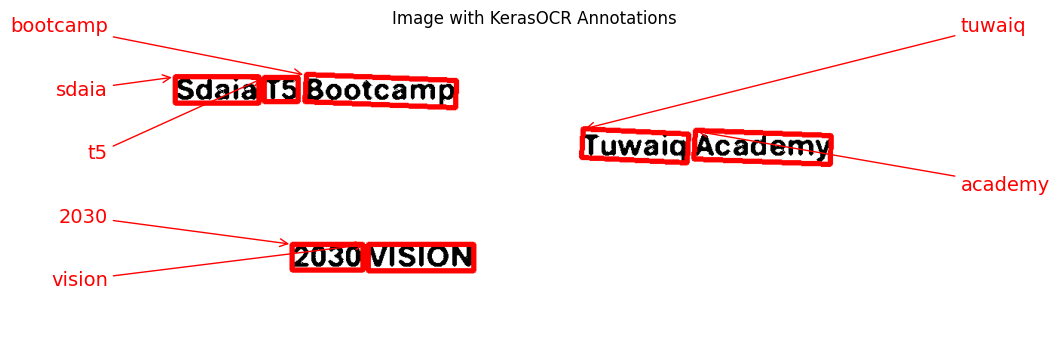

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction_groups[0], ax=ax)
plt.title("Image with KerasOCR Annotations")
plt.axis('off')
plt.show()